<a href="https://colab.research.google.com/github/vushang/sber_probability_of_default/blob/main/sber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание для Junior DS по разработке PD модели

<b>Задание:</b> Необходиом разработать модель предсказания дефолта. Даны финансовые данные 32 395 компаний (выручка, активы, пассивы и т.д). Результат будет оцениваться на скрытой выборке из 200 компаний по метрике качества accuracy_score

<b>Цель задания</b> научиться / показать знания в разработке моделей оценки риска - probability of default. Задание приближено к реальному, данные синтетические. Лидерборд для оценки собственного решения и геймификации процесса обучения. Первое место в лидерборде не явлется целью. Цель - правильно разарботанная модель, удовлетворяющая требованиям банковской системы. В случае возникновения вопросов, сотрудники блока Риски готовы проконсультировать и дать обратную связь на модель (телеграм чат).

<b>Метрика качества</b> accuracy_score вычисляется, как ( True positive + True negative ) / Total. Если сабмит-файл, не правильного формата или неверное количество строк, метрика будет = 0.

### Импортируем библиотеки

In [1]:
import pandas as pd
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Подгружаем данные

In [2]:
!wget https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-train.csv
!wget https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-test.csv
!wget https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-desc.csv

--2022-09-27 18:56:55--  https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5329268 (5.1M) [text/plain]
Saving to: ‘PD-data-train.csv.2’

PD-data-train.csv.2 100%[===================>]   5.08M  --.-KB/s    in 0.08s   

2022-09-27 18:56:55 (67.1 MB/s) - ‘PD-data-train.csv.2’ saved [5329268/5329268]

--2022-09-27 18:56:55--  https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28259

In [3]:
train_df = pd.read_csv('PD-data-train.csv', sep=';')
test_df = pd.read_csv('PD-data-test.csv', sep=';')
desc_df = pd.read_csv('PD-data-desc.csv', sep=';')

Описание данных

In [4]:
desc_df

,field,desc_eng,desc_rus
0,ar_revenue,Sales revenue (at the end of the last year),Выручка от реализации (на конец последнего года)
1,ar_total_expenses,Total expenses for the last year,Общие расходы за последний год
2,ar_sale_cost,Cost of sales (at the end of the last year),Себестоимость продаж (на конец последнего года)
3,ar_selling_expenses,Selling expenses (at the end of the last year),Коммерческие расходы (на конец последнего года)
4,ar_management_expenses,Administrative expenses (at the end of the las...,Управленческие расходы (на конец последнего года)
5,ar_sale_profit,Profit from sales (at the end of the last year),Прибыль от реализации (на конец последнего года)
6,ar_balance_of_rvns_and_expns,Balance of income and expenses (at the end of ...,Баланс доходов и расходов (на конец последнего...
7,ar_profit_before_tax,Gross Profit (end of last year),Валовая прибыль (на конец последнего года)
8,ar_taxes,Current income tax (at the end of the last year),Текущий на налог на прибыль (на конец последне...
9,ar_other_profit_and_losses,Other income and expenses (at the end of the l...,Прочие доходы и расходы (на конец последнего г...


Семплы и размеры выборок

In [5]:
train_df.head()

,record_id,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,...,adr_actual_age,head_actual_age,cap_actual_age,ul_staff_range,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg,default_12m
0,7,52996000.0,48344000.0,48344000.0,0.0,0.0,4652000.0,-2608000.0,2044000.0,846000.0,...,3,3,3,[1-100],50000.0,2,0,0,0,0
1,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12,12,12,[1-100],10000.0,5,0,0,0,0
2,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28,28,28,[1-100],10000.0,2,0,0,0,0
3,22,32049000.0,29568000.0,29568000.0,0.0,0.0,2481000.0,-260000.0,2221000.0,302000.0,...,8,8,8,[1-100],300000.0,1,0,0,0,0
4,23,16458000.0,14935000.0,14935000.0,0.0,0.0,1523000.0,-274000.0,1249000.0,538000.0,...,27,27,27,[1-100],10000.0,2,0,0,0,0


In [6]:
train_df.shape

(32395, 37)

In [7]:
test_df.head()

,record_id,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,...,ogrn_age,adr_actual_age,head_actual_age,cap_actual_age,ul_staff_range,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg
0,196,39103000.0,38913000.0,38913000.0,0.0,0.0,190000.0,141000.0,331000.0,284000.0,...,135,3,3,3,[1-100],100000.0,1,0,0,0
1,1196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,138,5,5,5,[1-100],100000.0,1,0,0,0
2,2813,54174000.0,50929000.0,50929000.0,0.0,0.0,3245000.0,-1278000.0,1967000.0,500000.0,...,138,20,20,20,[1-100],250000.0,2,0,0,0
3,4385,1904000.0,1679000.0,1679000.0,0.0,0.0,225000.0,-88000.0,137000.0,0.0,...,139,9,9,9,[1-100],10000.0,2,0,0,0
4,6479,225584000.0,210685000.0,210685000.0,0.0,0.0,14899000.0,-12715000.0,2184000.0,445000.0,...,139,3,3,3,(100-500],1700598.0,84,0,0,0


In [8]:
test_df.shape

(200, 36)

Количество разных типов фичей

In [9]:
train_df.dtypes.value_counts()

float64    25
int64      11
object      1
dtype: int64

Уровень дефолт-рейта в выборке = 6,7219%

In [10]:
train_df['default_12m'].values.mean()

0.06454699799351751

In [11]:
train_df.record_id.nunique()

32395

32395 уникальных наблюдений

### Строим бэйзлайн модель c 3-ми фичами

In [12]:
features = ['bus_age','ul_capital_sum', 'ul_founders_cnt']

In [13]:
features_df = train_df.loc[:,features]
features_df['default_12m'] = train_df['default_12m']

In [14]:
features_df.head()

,bus_age,ul_capital_sum,ul_founders_cnt,default_12m
0,198,50000.0,2,0
1,256,10000.0,5,0
2,33,10000.0,2,0
3,185,300000.0,1,0
4,220,10000.0,2,0


### Построим карту коллеряций

In [15]:
features_df.corr()

,bus_age,ul_capital_sum,ul_founders_cnt,default_12m
bus_age,1.000000,0.066929,0.209451,-0.109389
ul_capital_sum,0.066929,1.000000,0.029165,-0.019452
ul_founders_cnt,0.209451,0.029165,1.000000,-0.023244
default_12m,-0.109389,-0.019452,-0.023244,1.000000


### Валидация результата

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features_df.drop('default_12m',axis=1),
                                                    features_df['default_12m'],
                                                    random_state=42, shuffle=True)

logit = LogisticRegression(C=1,solver='lbfgs',max_iter=1000)
cv_baseline = cross_val_score(logit, X_train, y_train, cv=5, scoring='roc_auc').mean()
cv_baseline

0.6483643068016243

ROC/AUC бэйзлайн модели - 64,83%

### Построение модели на всех данных

In [17]:
logit.fit(features_df.drop('default_12m',axis=1), features_df['default_12m'])

LogisticRegression(C=1, max_iter=1000)

### Формирование файла с ответом

In [18]:
answ_df = test_df[['record_id']]

In [19]:
answ_df['id'] = answ_df['record_id']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:

answ_df.drop('record_id',axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
cutoff = y_train.mean()

In [22]:
answ_df['predict'] = (logit.predict_proba(test_df.loc[:,features])[:,1]>cutoff).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
answ_df.to_csv('PD-submit.csv',index=False, sep=';')

Для загрузки своего рузультата на https://dsbattle.com/hackathons/juniords-new/ вам нужно создать csv файл с двумя колонками (id, predict), разделитель - точка с запятой (;)

### Моя работа

In [24]:
from sklearn.metrics import roc_auc_score, accuracy_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import seaborn as sns
from scipy import stats

Классы не сбалансированны

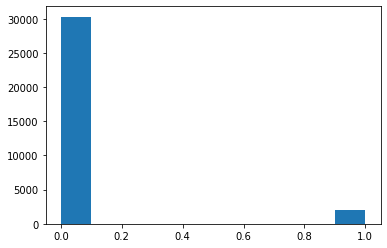

In [25]:
plt.hist(train_df['default_12m'])
plt.show()   

Проверю признаки на нормальность

In [26]:
for i in train_df.drop(['ul_staff_range'], axis = 1).columns:
  print(i, stats.shapiro(train_df[i]))

record_id ShapiroResult(statistic=0.9546059370040894, pvalue=0.0)
ar_revenue ShapiroResult(statistic=nan, pvalue=1.0)
ar_total_expenses ShapiroResult(statistic=nan, pvalue=1.0)
ar_sale_cost ShapiroResult(statistic=nan, pvalue=1.0)
ar_selling_expenses ShapiroResult(statistic=nan, pvalue=1.0)
ar_management_expenses ShapiroResult(statistic=nan, pvalue=1.0)
ar_sale_profit ShapiroResult(statistic=nan, pvalue=1.0)
ar_balance_of_rvns_and_expns ShapiroResult(statistic=nan, pvalue=1.0)
ar_profit_before_tax ShapiroResult(statistic=nan, pvalue=1.0)
ar_taxes ShapiroResult(statistic=nan, pvalue=1.0)
ar_other_profit_and_losses ShapiroResult(statistic=nan, pvalue=1.0)
ar_net_profit ShapiroResult(statistic=nan, pvalue=1.0)
ab_immobilized_assets ShapiroResult(statistic=nan, pvalue=1.0)
ab_mobile_current_assets ShapiroResult(statistic=nan, pvalue=1.0)
ab_inventory ShapiroResult(statistic=nan, pvalue=1.0)
ab_accounts_receivable ShapiroResult(statistic=nan, pvalue=1.0)
ab_other_current_assets ShapiroResul

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [27]:
not_norm_feach = ['bus_age', 'ogrn_age', 'adr_actual_age', 'head_actual_age', 'cap_actual_age', 'ul_capital_sum', 'ul_founders_cn', 'ul_branch_cnt', 'ul_strategic_flg']
norm_feach = ['ar_revenue',
 'ar_management_expenses',
 'ar_net_profit',
 'record_id',
 'ab_immobilized_assets',
 'ab_mobile_current_assets',
 'ab_long_term_liabilities',
 'ab_accounts_receivable',
 'ul_founders_cnt',
 'ar_profit_before_tax',
 'ab_cash_and_securities',
 'ab_own_capital',
 'ab_borrowed_capital',
 'ar_sale_cost',
 'ab_other_borrowings',
 'ar_sale_profit',
 'ar_total_expenses',
 'ab_other_current_assets',
 'ar_taxes',
 'ar_other_profit_and_losses',
 'ab_losses',
 'ar_selling_expenses',
 'ul_systematizing_flg',
 'ab_short_term_borrowing',
 'ab_inventory',
 'ar_balance_of_rvns_and_expns',
 'ab_accounts_payable']

Проведу диспресионный анализ с трейном и тестом, проведу отбор признаков

In [28]:
for i in norm_feach:
  print(i, stats.f_oneway(train_df[i].dropna(), test_df.dropna()[i]))

ar_revenue F_onewayResult(statistic=0.11175311691884997, pvalue=0.7381610423218125)
ar_management_expenses F_onewayResult(statistic=1.845071468918922, pvalue=0.17437538310139195)
ar_net_profit F_onewayResult(statistic=0.07846727007799659, pvalue=0.779388708096403)
record_id F_onewayResult(statistic=0.003358907724731897, pvalue=0.9537839657948298)
ab_immobilized_assets F_onewayResult(statistic=0.014454020181279345, pvalue=0.904306408261559)
ab_mobile_current_assets F_onewayResult(statistic=0.26526436855336316, pvalue=0.6065328811141789)
ab_long_term_liabilities F_onewayResult(statistic=0.2804265430511945, pvalue=0.596428564957441)
ab_accounts_receivable F_onewayResult(statistic=0.03218851689066133, pvalue=0.8576166328126035)
ul_founders_cnt F_onewayResult(statistic=0.02538062344815004, pvalue=0.87342329084506)
ar_profit_before_tax F_onewayResult(statistic=0.06386427621863909, pvalue=0.8004923627755307)
ab_cash_and_securities F_onewayResult(statistic=0.4416384240109131, pvalue=0.50634155

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


In [29]:
new_feach = ['ar_revenue',
 'ar_net_profit',
 'record_id',
 'ab_immobilized_assets',
 'ab_mobile_current_assets',
 'ab_long_term_liabilities',
 'ab_accounts_receivable',
 'ul_founders_cnt',
 'ar_profit_before_tax',
 'ab_cash_and_securities',
 'ab_borrowed_capital',
 'ar_sale_cost',
 'ab_other_borrowings',
 'ar_sale_profit',
 'ar_total_expenses',
 'ab_other_current_assets',
 'ar_taxes',
 'ar_other_profit_and_losses',
 'ab_losses',
 'ar_selling_expenses',
 'ab_inventory',
 'ar_balance_of_rvns_and_expns',
 'ab_accounts_payable']

In [30]:
new_feach.append('default_12m')

In [31]:
new_train_na = train_df[new_feach]

In [32]:
new_train_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32395 entries, 0 to 32394
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ar_revenue                    17250 non-null  float64
 1   ar_net_profit                 17250 non-null  float64
 2   record_id                     32395 non-null  int64  
 3   ab_immobilized_assets         17250 non-null  float64
 4   ab_mobile_current_assets      17250 non-null  float64
 5   ab_long_term_liabilities      17250 non-null  float64
 6   ab_accounts_receivable        17250 non-null  float64
 7   ul_founders_cnt               32395 non-null  int64  
 8   ar_profit_before_tax          17250 non-null  float64
 9   ab_cash_and_securities        17250 non-null  float64
 10  ab_borrowed_capital           17250 non-null  float64
 11  ar_sale_cost                  17250 non-null  float64
 12  ab_other_borrowings           17250 non-null  float64
 13  a

Ввиду малого кол-ва признаков без пропусков, удалю строки с пропусками

In [33]:
new_train = new_train_na.dropna()

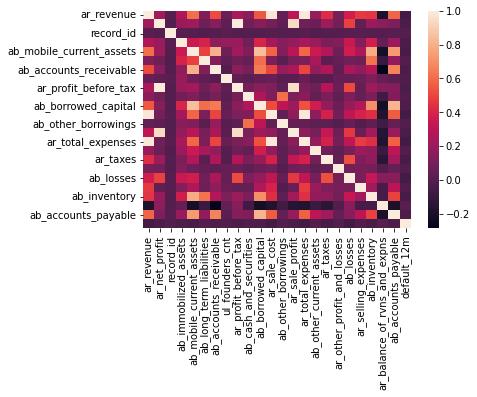

In [34]:
sns.heatmap(new_train.corr())

In [35]:
X_df = new_train.drop('default_12m',axis=1)
y_df = new_train['default_12m']

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state=42, shuffle=True)

Построю тестовую модель 

In [36]:
model = RandomForestClassifier(max_depth = 10)

In [37]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [38]:
print('train', roc_auc_score(model.predict(X_train), y_train))
print('test', roc_auc_score(model.predict(X_test), y_test))

train 0.9779625326749927
test 0.9772199651770168


Довольно неплохой результат, проверим на заполненных средним данных

In [39]:
all_na_train = new_train_na[new_train_na['ar_net_profit'].isna() == True]

In [40]:
fillna_train = all_na_train.fillna(pd.concat([train_df, test_df]).mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [41]:
X_temp = fillna_train.drop('default_12m', axis = 1)
y_temp = fillna_train['default_12m']

In [42]:
model.predict(X_temp).sum()

0

Модель ПЛОХО работает на незаполненных данных

In [43]:
model.feature_importances_

array([0.05753152, 0.0577964 , 0.06612539, 0.02190832, 0.0548955 ,
       0.03607408, 0.0473206 , 0.0233937 , 0.05772703, 0.07042644,
       0.04411857, 0.05286352, 0.01260589, 0.04979278, 0.05591523,
       0.01632927, 0.04405523, 0.01034753, 0.05983586, 0.01551374,
       0.05102599, 0.04495397, 0.04944343])

Это же подтверждается feature_importances

Построю модель на сбалансированных данных

In [44]:
balanced_train = pd.concat([new_train[new_train['default_12m'] == 1], new_train[new_train['default_12m'] == 0].sample(2400)])

In [45]:
X_df = balanced_train.drop('default_12m',axis=1)
y_df = balanced_train['default_12m']

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state=42, shuffle=True)

In [46]:
balanced_model = RandomForestClassifier(max_depth = 10)

In [47]:
balanced_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [48]:
print('train', roc_auc_score(balanced_model.predict(X_train), y_train))
print('test', roc_auc_score(balanced_model.predict(X_test), y_test))

train 0.9273266381195896
test 0.7556107431935247


Учитывая что тест выборка довольно маленькая, посмотрим метрику на всех данных

In [49]:
roc_auc_score(balanced_model.predict(new_train.drop('default_12m', axis = 1)), new_train['default_12m'])

0.7391273484269667

Т.к. эта модель хуже, на заполненных данных будем использовать предыдущую модель

Обе модели дают плохой результат на данных с пропусками, построю отдельную модель для таких данных

In [50]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32395 entries, 0 to 32394
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     32395 non-null  int64  
 1   ar_revenue                    17250 non-null  float64
 2   ar_total_expenses             17250 non-null  float64
 3   ar_sale_cost                  17250 non-null  float64
 4   ar_selling_expenses           17250 non-null  float64
 5   ar_management_expenses        17250 non-null  float64
 6   ar_sale_profit                17250 non-null  float64
 7   ar_balance_of_rvns_and_expns  17250 non-null  float64
 8   ar_profit_before_tax          17250 non-null  float64
 9   ar_taxes                      17250 non-null  float64
 10  ar_other_profit_and_losses    17250 non-null  float64
 11  ar_net_profit                 17250 non-null  float64
 12  ab_immobilized_assets         17250 non-null  float64
 13  a

In [51]:
feach_for_na = ['bus_age',
                'ogrn_age',
                'adr_actual_age',
                'head_actual_age',
                'cap_actual_age',
                'ul_capital_sum',
                'ul_founders_cnt',
                'ul_branch_cnt',
                'ul_strategic_flg',
                'ul_systematizing_flg',
                'default_12m']

In [52]:
na_train = train_df[feach_for_na]

In [53]:
na_train.corr()

,bus_age,ogrn_age,adr_actual_age,head_actual_age,cap_actual_age,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg,default_12m
bus_age,1.000000,0.857461,0.024042,0.024042,0.024042,0.066929,0.209451,0.072114,0.019558,NaN,-0.109389
ogrn_age,0.857461,1.000000,0.112917,0.112917,0.112917,0.031248,0.135324,0.057367,-0.004546,NaN,-0.121140
adr_actual_age,0.024042,0.112917,1.000000,1.000000,1.000000,-0.032239,-0.018616,0.067083,-0.011436,NaN,-0.055146
head_actual_age,0.024042,0.112917,1.000000,1.000000,1.000000,-0.032239,-0.018616,0.067083,-0.011436,NaN,-0.055146
cap_actual_age,0.024042,0.112917,1.000000,1.000000,1.000000,-0.032239,-0.018616,0.067083,-0.011436,NaN,-0.055146
ul_capital_sum,0.066929,0.031248,-0.032239,-0.032239,-0.032239,1.000000,0.029165,0.018191,0.165226,NaN,-0.019452
ul_founders_cnt,0.209451,0.135324,-0.018616,-0.018616,-0.018616,0.029165,1.000000,0.012314,0.035822,NaN,-0.023244
ul_branch_cnt,0.072114,0.057367,0.067083,0.067083,0.067083,0.018191,0.012314,1.000000,-0.000609,NaN,-0.014410
ul_strategic_flg,0.019558,-0.004546,-0.011436,-0.011436,-0.011436,0.165226,0.035822,-0.000609,1.000000,NaN,-0.002528
ul_systematizing_flg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
feach_for_na = ['bus_age',
                'adr_actual_age',
                'ul_capital_sum',
                'ul_founders_cnt',
                'ul_branch_cnt',
                'ul_strategic_flg',
                'ul_systematizing_flg',
                'default_12m']
na_train = train_df[feach_for_na]

В ходе тестов выяснил, что обучая модель для данных с пропусками, лучше балансить классы

In [55]:
na_train = pd.concat([na_train[na_train['default_12m'] == 1], na_train[na_train['default_12m'] == 0].sample(4000)])

In [56]:
X_df = na_train.drop('default_12m',axis=1)
y_df = na_train['default_12m']

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state=42, shuffle=True)

In [57]:
na_model = RandomForestClassifier(n_estimators = 150, max_depth = 10, criterion = 'gini')

In [58]:
na_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=150)

In [59]:
print('test', roc_auc_score(na_model.predict(X_test), y_test))
print('test', roc_auc_score(na_model.predict(X_train), y_train))

test 0.6531464309861875
test 0.7703797213456567


Довольно неплохо, напишем функцию full_predict для предсказаний

In [60]:
from tqdm import tqdm

In [61]:
def full_predict(df, model1, model2, feach_for_na, new_feach):
  ans = []
  for i in tqdm(range(df.shape[0])):
    string = df.iloc[[i]]
    if np.isnan(df.iloc[i]['ar_revenue']):
      ans.append(model1.predict(string[feach_for_na]))
    else:
      ans.append(model2.predict(string[new_feach]))
  return ans

In [62]:
f1 = feach_for_na[:7]
f2 = new_feach[:23]

Запишу финальное предсказание

In [65]:
final_p = full_predict(test_df, na_model, model, f1, f2)

100%|██████████| 200/200 [00:06<00:00, 31.26it/s]


In [66]:
final_preds = [i[0] for i in final_p]

In [67]:
my_answ = answ_df

In [68]:
my_answ['predict'] = final_preds

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
my_answ.to_csv('PD-submit.csv',index=False, sep=';')

Вывод. Данная стратегия разработа конкретно для этой задачи, т.к. пропуски находятся в одинаковых признаках построчно! Что можно сделать для улучшения решения. Подобрать лучшие гиперпараметры для моделей, провести дополнительный отбор признаков по другим критериям (например по матрицам корреляций), придумать другую стратегию для предсказания на незаполненных данных (возможно какое-то "умное" заполнение).  